## Project Customer Churn Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cust_data = pd.read_csv("customer_churn.csv")

In [3]:
cust_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
cust_5 = cust_data.iloc[:,4]
cust_5.head(10)

0     No
1     No
2     No
3     No
4     No
5     No
6    Yes
7     No
8     No
9    Yes
Name: Dependents, dtype: object

In [5]:
cust_15 = cust_data.iloc[:, 14]
cust_15.head(10)

0     No
1     No
2     No
3     No
4     No
5    Yes
6     No
7     No
8    Yes
9     No
Name: StreamingMovies, dtype: object

In [6]:

senior_male_electronic = cust_data[(cust_data['gender'] == 'Male') & 
                                   (cust_data['PaymentMethod'] == 'Electronic check') & 
                                   (cust_data['SeniorCitizen']==1)]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [7]:
cust_total_tenure = cust_data[(cust_data['tenure'] > 70) & 
                                   (cust_data['MonthlyCharges'] > 100)]
cust_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
59,5954-BDFSG,Female,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.50,7853.7,No
94,9848-JQJTX,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),100.90,7459.05,No
106,6728-DKUCO,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,104.15,7303.05,No
193,9680-NIAUV,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),109.70,8129.3,No


In [8]:
two_mail_yes = cust_data[(cust_data['Contract'] == 'Two year') & 
                                   (cust_data['PaymentMethod'] == 'Mailed check') & 
                                   (cust_data['Churn']=='Yes')]
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [9]:
cust_333=cust_data.sample(n=333, random_state=40)
cust_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2180,7375-WMVMT,Male,1,Yes,No,71,Yes,No,Fiber optic,No,...,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),95.50,6707.15,No
365,1010-DIAUQ,Male,0,No,No,5,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),96.50,492.55,Yes
45,3714-NTNFO,Female,0,No,No,49,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.50,3906.7,No
6149,3069-SSVSN,Female,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,One year,No,Mailed check,25.85,25.85,No
5057,7354-OIJLX,Male,0,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.85,724.65,No


In [10]:
cust_churn=cust_data['Churn'].value_counts()
print(cust_churn)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [11]:
cust_intser=cust_data['InternetService'].value_counts()
cust_intser.head()


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Text(0, 0.5, 'Counts of Categories')

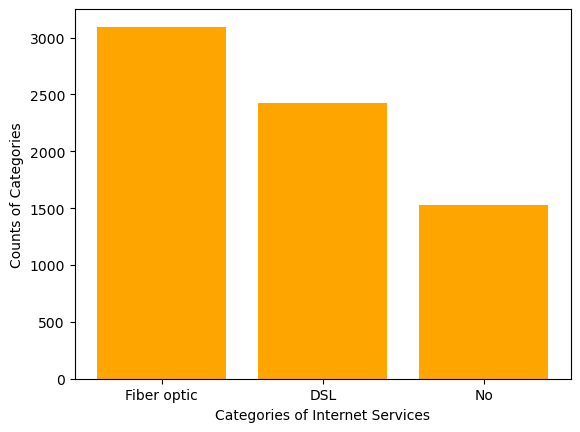

In [12]:
plt.bar(cust_intser.index, cust_intser, color = 'orange' )
plt.xlabel("Categories of Internet Services")
plt.ylabel("Counts of Categories")

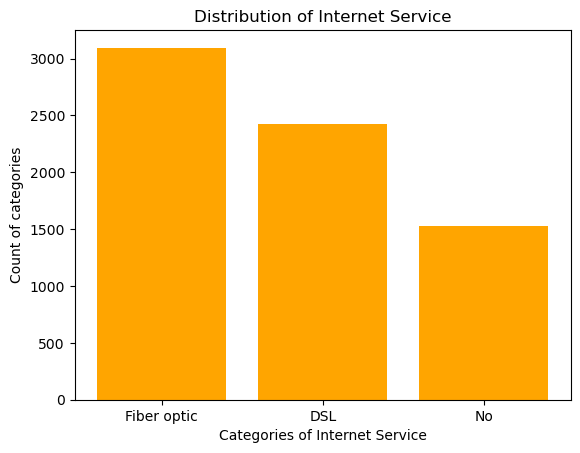

In [13]:
plt.bar(cust_data['InternetService'].value_counts().keys().tolist(),cust_data['InternetService'].value_counts().tolist(),color='orange')
#We are creating the bar-plot using plt.bar()
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')
plt.show() 

In [14]:
x=cust_data[['tenure']]
y=cust_data[['Churn']]
#We are starting off by extracting the target and feature columns.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=20) 

In [15]:

!pip install --upgrade tensorflow 

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/f9/14/67e9b2b2379cb530c0412123a674d045eca387dfcfa7db1c0028857b0a66/tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for h5py>=3.10.0 from https://files.pythonhosted.org/packages/8d/70/2b0b99507287f66e71a6b2e66c5ad2ec2461ef2c534668eef96c3b48eb6d/h5py-3.10.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for ml-dtypes~=0.3.1 from https://files.pythonhosted.org/packages/6e/a4/6aabb78f1569550fd77c74d2c1d008b502c8ce72776bd88b14ea6c182c9e/ml_dtypes-0.3.2-cp311-cp311-macosx_10_9_universal2.whl.metadata
  Obtaining dependency information for tensorboard<2.17,>=2.16 from https://files.pythonhosted.org/packages/3a/d0/b97889ffa769e2d1fdebb632084d5e8b53fc299d43a537acee7ec0c021a3/tensorboard-2.16.2-py3-none-any.whl.metadata
  Obtaining dependency information for keras>=3.0.0 from https://files.pythonhosted.org/packages/b0/b2/104

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
import tensorflow  
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense 